In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"

visa_df = pd.read_csv(file_path)

visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Box-Plot**

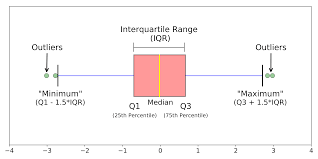

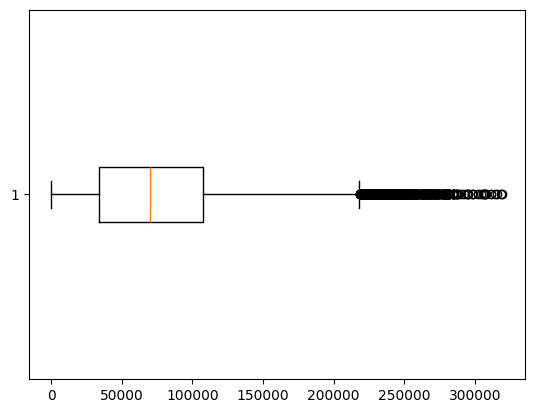

In [3]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)

plt.show()

# black dots are outliers

**Dealing-Outliers**

- Removal of outliers

- impute the outliers with median value
    - because median is not impact by outliers

- cap the outliers with Q3, which are having more than Q3

- cap the outliers with Q1, which are having less than Q1

**Find the outliers**

- Q3+1.5*IQR>    and Q1-1.5*IQR

- Step-1: Calculate Q1 Q2 Q3
    
- Step-2: Calculate IQR=(Q3-Q1)
    
- Step-3: UB=Q3+1.5*IQR
    
- Step-4: LB=Q1-1.5*IQR
    
- Step-5: con1= col>UB
    
- Step-6: con2= col<LB
    
- Step-7: con1|con2
    
- Step-8: col[con1|con2]

In [4]:
# Step-1: Calculate Q1 Q2 Q3
q1 = np.quantile(visa_df['prevailing_wage'],0.25)
q2 = np.quantile(visa_df['prevailing_wage'],0.50)
q3 = np.quantile(visa_df['prevailing_wage'],0.75)

# Step-2: Calculate IQR=(Q3-Q1) 
IQR = q3-q1

# Step-3: UB=Q3+1.5*IQR
ub = q3+1.5*IQR

# Step-4: LB=Q1-1.5*IQR
lb = q1-1.5*IQR 

# Step-5: con1= col>UB
con1 = visa_df['prevailing_wage'] > ub

# Step-6: con2= col<LB
con2 = visa_df['prevailing_wage'] < lb

# Step-7: con1|con2
con1 | con2

# Step-8: col[con1|con2]
#outliers = visa_df['prevailing_wage'][con1|con2]
outliers = visa_df.prevailing_wage[con1 | con2]

# series into array of values by applying a .values
outliers_data = outliers.values
len(outliers_data)

427

In [5]:
def outliers():
    q1 = np.quantile(visa_df['prevailing_wage'],0.25)
    q2 = np.quantile(visa_df['prevailing_wage'],0.50)
    q3 = np.quantile(visa_df['prevailing_wage'],0.75)
    IQR = q3-q1
    ub = q3+1.5*IQR
    lb = q1-1.5*IQR 
    con1 = visa_df['prevailing_wage'] > ub
    con2 = visa_df['prevailing_wage'] < lb
    #################################################
    #outliers = visa_df['prevailing_wage'][con1|con2]
    outliers = visa_df.prevailing_wage[con1 | con2]
    #################################################
    outliers_data = outliers.values
    return(outliers_data)

outliers_data = outliers()
len(outliers_data)

# Alt+tab to remove tab in one go for all the lines

427

In [6]:
q1 = np.quantile(visa_df['prevailing_wage'],0.25)
q2 = np.quantile(visa_df['prevailing_wage'],0.50)
q3 = np.quantile(visa_df['prevailing_wage'],0.75)
IQR = q3-q1
ub = q3+1.5*IQR
lb = q1-1.5*IQR 
con1 = visa_df['prevailing_wage'] > ub
con2 = visa_df['prevailing_wage'] < lb
#################################################
outliers_df = visa_df[con1|con2] # outliers dataframe 427

outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [7]:
len(outliers_data),len(visa_df),len(outliers_df)*100/len(visa_df)

(427, 25480, 1.6758241758241759)

**Case-1**:
    
**Removal of outliers**

- we have 427 outliers in pre_wage column

- that means we need to remove 427 rows from entire dataframe

In [8]:
q1 = np.quantile(visa_df['prevailing_wage'],0.25)
q2 = np.quantile(visa_df['prevailing_wage'],0.50)
q3 = np.quantile(visa_df['prevailing_wage'],0.75)
IQR = q3-q1
ub = q3+1.5*IQR
lb = q1-1.5*IQR 
con1 = visa_df['prevailing_wage'] < ub
con2 = visa_df['prevailing_wage'] > lb
#################################################
non_outliers_df = visa_df[con1&con2] 

non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


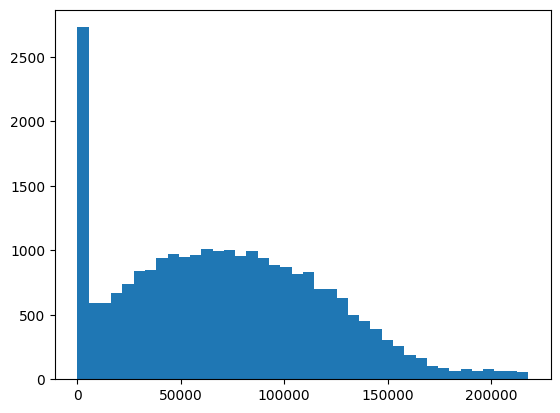

In [9]:
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

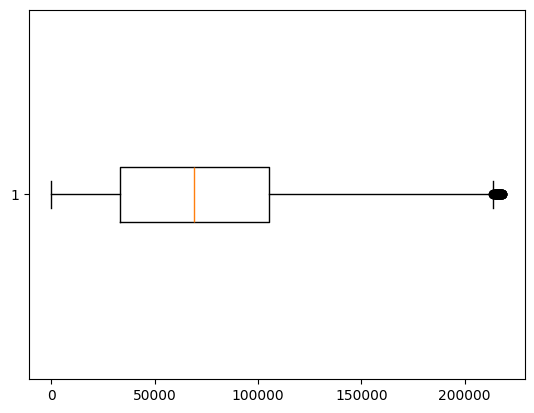

In [10]:
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)
plt.show()

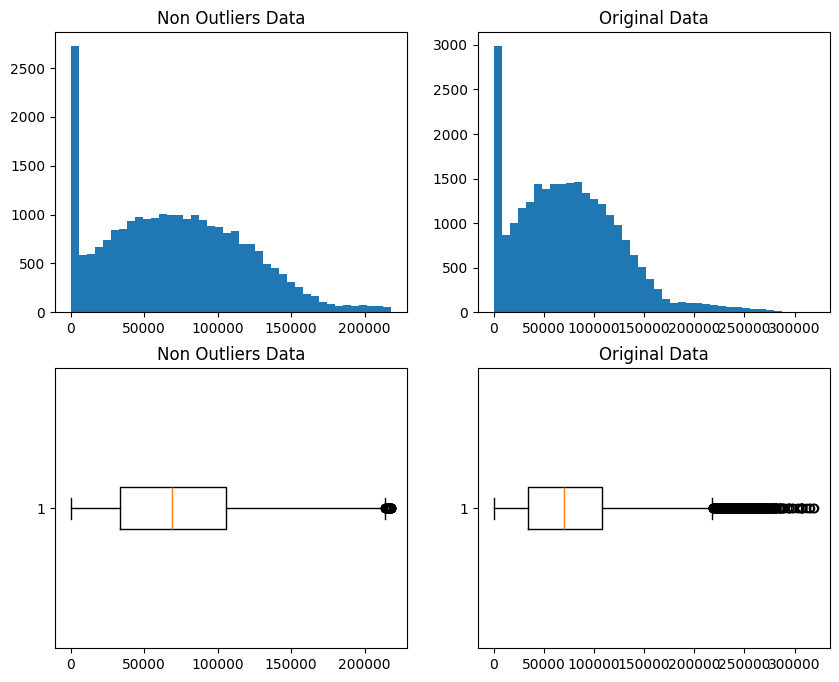

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("Non Outliers Data")
plt.hist(non_outliers_df['prevailing_wage'],bins=40)

plt.subplot(2,2,2)
plt.title("Original Data")
plt.hist(visa_df['prevailing_wage'],bins=40)

plt.subplot(2,2,3)
plt.title("Non Outliers Data")
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)

plt.subplot(2,2,4)
plt.title("Original Data")
plt.boxplot(visa_df['prevailing_wage'],vert=False)

plt.show()

$Case-2$:
    
**Impute with Median**

- We got pre_wage has 427 outliers

- we replace those 427 with median value of pre_wage

In [12]:
# iterate through pre_wages as i
# if a value>ub or <lb ===> median
# else: i

In [13]:
new_values = []

for i in visa_df['prevailing_wage'].values:
    if i>ub or i<lb:
        new_values.append(visa_df['prevailing_wage'].median)
    else:
        new_values.append(i)

len(new_values)

# We are iterate trough pre_wage data
# if any datapoint >ub or <lb means it is a outliers so in that postition
#                  we are keeping medain value of the column

# otherwise we are keeping the same value

25480

**np.where**

In [27]:
dict1 = {'Col1':[1,2,3,4],
         'Col2':['A','B','C','D']}

data = pd.DataFrame(dict1)

data

# I want to impute with a value 100 in the col1
# which are having > 2
# Col1  Col2
#  1     A
#  2     B
#  100   C
#  100   D

,Col1,Col2
0,1,A
1,2,B
2,3,C
3,4,D


- np.where will take 3 argument values

- Condition :   con=data['Col1']>2
    
- If that condition is True will provide the value:100
    
- If that condition is False will keep the same value: data['Col1']
    
- np.where(<condition>,<True_value>,<False_value>)

In [28]:
data['Col1']>2

0    False
1    False
2     True
3     True
Name: Col1, dtype: bool

In [29]:
con = data['Col1']>2
np.where(con,100,data['Col1'])

# above method works only with 2 conditions
# binary condtions like True False
# and if else.

array([  1,   2, 100, 100], dtype=int64)

$Case-1$

**create a new column**


In [30]:
data['new_col']=[100,200,300,400]
data

,Col1,Col2,new_col
0,1,A,100
1,2,B,200
2,3,C,300
3,4,D,400


In [31]:
con=data['Col1']>2
data['Col3']=np.where(con,100,data['Col1'])
data

,Col1,Col2,new_col,Col3
0,1,A,100,1
1,2,B,200,2
2,3,C,300,100
3,4,D,400,100


$Case-2$:
    
**Overwrite the column values**

In [32]:
con=data['Col1']>2
data['Col1']=np.where(con,100,data['Col1'])
data

,Col1,Col2,new_col,Col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


In [33]:
# drop unwanted columns

data.drop(['new_col','Col3'],
          axis=1,
          inplace=True)


In [34]:
data

,Col1,Col2
0,1,A
1,2,B
2,100,C
3,100,D


$Task$

**Implement the same thing for Prevailaing wage**

In [ ]:
# step-1: write the condition
# step-2: True value: Medain value
# Step-3: False value: same column values
# Step-4: implment np.where(<con1>,<True_vale>,<False_vale>)
# Step-5: Overwrite in the same column name
# Step-6: Draw the boxplot for p_Wage
# Step-7: Daraw the histogram  p_wage

In [35]:
con1=visa_df['prevailing_wage']>ub
con2=visa_df['prevailing_wage']<lb
con=con1|con2
wage_median=visa_df['prevailing_wage'].median()
visa_df['prevailing_wage']=np.where(con,
                                    wage_median,
                                    visa_df['prevailing_wage'])

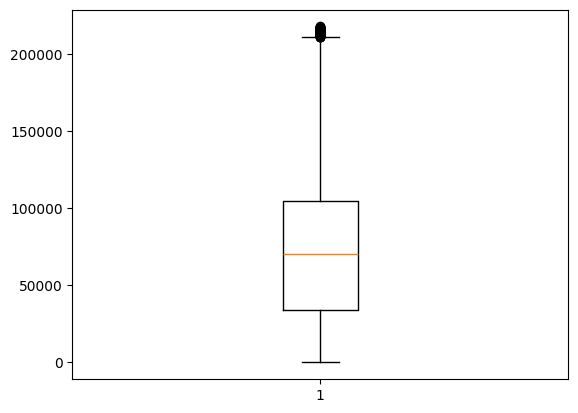

In [37]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()